# **Transformaciones que estabilizan la varianza**


De acuerdo a lo visto anteriormente, es necesario contar con herramientas para estabilizar la varianza caso sea no existe homogeneidad en ésta y sea una función con constante del tiempo. 

La herramienta más común y tradicional para estos escenarios es la transformación de **Box-Cox**.



La transformación de **Box-Cox** es un caso general de varias otras transformaciones comunes.

Sea $\{y_t\}$ la serie original, la serie transformada está dada por $\{w_t\}$ donde 

$$
w_t=\begin{cases}
\log(y_t), & \lambda=0, \\
\frac{y_{t}^{\lambda} - 1}{\lambda}, & \lambda\neq 0
\end{cases}
$$

Siempre que $-1\leq\lambda\leq 1$


**Algunos casos particulares de la transformación Box-Cox**

- $\lambda =1 \ \ $  No hay transformación
- $\lambda =\frac{1}{2} \ \ $ raíz cuadrada y transformación lineal
- $\lambda =\frac{1}{3} \ \ $ raíz cúbica y transformación lineal
- $\lambda =0 \ \ $ Logaritmo natural
- $\lambda =-1 \ \ $ Inversa


- Seleccionar los datos positivos: La transformación de Box-Cox solo es aplicable a datos que son estrictamente positivos, por lo que todos los valores deben ser mayores que cero.

- Elegir el valor de $\lambda$: El valor óptimo de $𝜆$λ se suele obtener mediante un procedimiento de máxima verosimilitud o mediante prueba y error. En algunos software, como R o Python, existe una función para encontrar este valor automáticamente.

- Aplicar la transformación: Utilizando la fórmula anterior, transformas tus datos según el valor de 
$𝜆$

Para ejemplificar.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.tsatools import detrend
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
from arch.unitroot import PhillipsPerron


In [2]:

# Cargar datos de AirPassengers
data = sm.datasets.get_rdataset("AirPassengers").data
data



,time,value
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
...,...,...
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390


In [3]:
Fecha=pd.date_range('1949-01-01',periods=144, freq='ME')
Fecha

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='ME')

In [4]:
data["Fecha"]=Fecha

data.set_index("Fecha", inplace=True)
data.drop(columns=["time"], inplace=True)


In [5]:
ts=data

In [6]:

# Mostrar datos
print(ts.head())
print(ts.describe())
print("Desviación estándar:", np.std(ts))


            value
Fecha            
1949-01-31    112
1949-02-28    118
1949-03-31    132
1949-04-30    129
1949-05-31    121
            value
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000
Desviación estándar: value    119.549042
dtype: float64


c:\Users\wsand\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


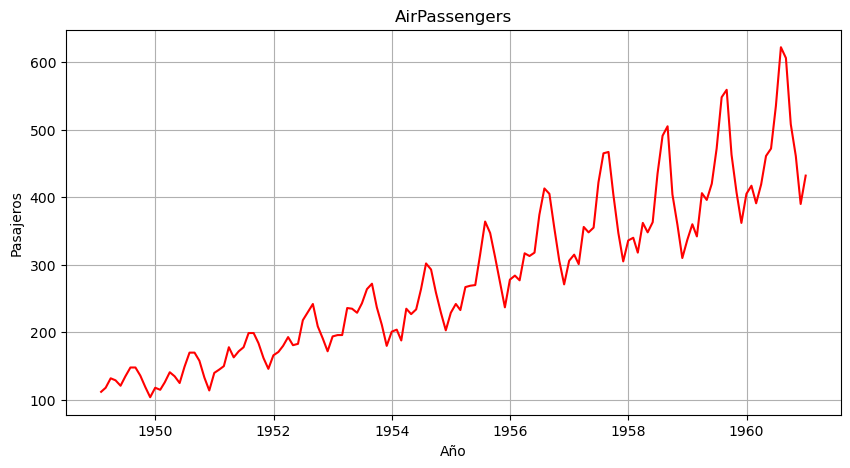

In [7]:

# Graficar serie original
plt.figure(figsize=(10, 5))
plt.plot(ts, color='red')
plt.title("AirPassengers")
plt.xlabel("Año")
plt.ylabel("Pasajeros")
plt.grid()
plt.show()


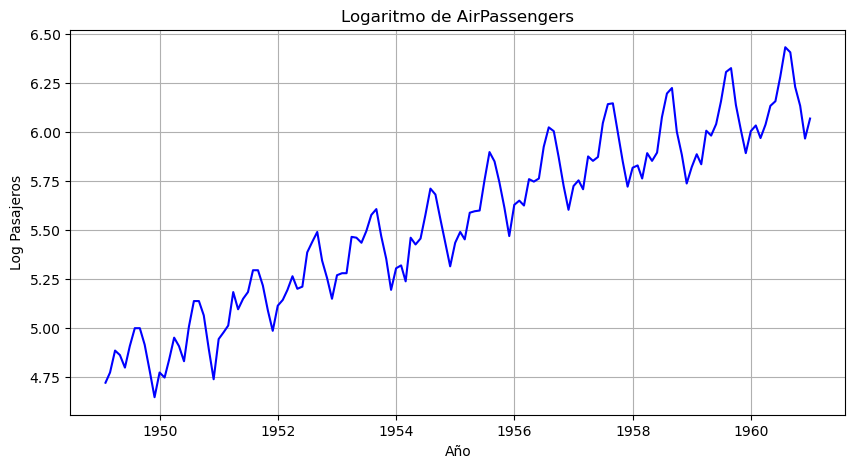

            value
count  144.000000
mean     5.542176
std      0.441456
min      4.644391
25%      5.192957
50%      5.581599
75%      5.887489
max      6.432940
Desviación estándar de la serie log: value    0.439921
dtype: float64


c:\Users\wsand\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [8]:

# Logaritmo de la serie
log_ts = np.log(ts)

plt.figure(figsize=(10, 5))
plt.plot(log_ts, color='blue')
plt.title("Logaritmo de AirPassengers")
plt.xlabel("Año")
plt.ylabel("Log Pasajeros")
plt.grid()
plt.show()

print(log_ts.describe())
print("Desviación estándar de la serie log:", np.std(log_ts))


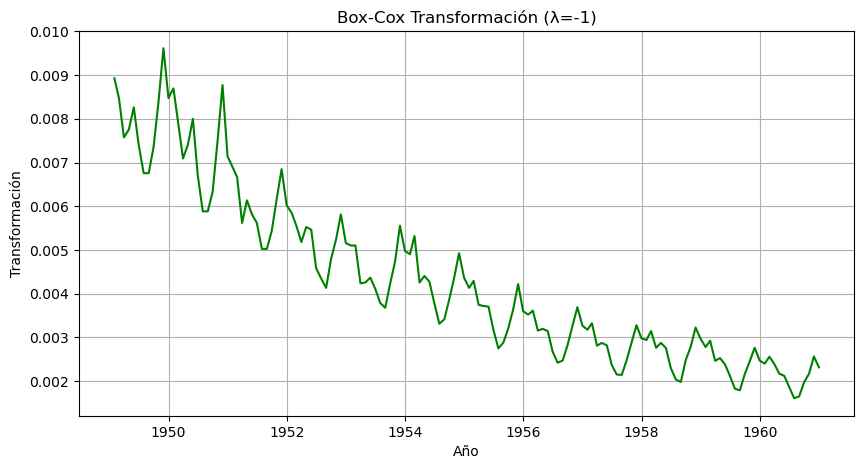

In [9]:

# Transformación Box-Cox con lambda = -1
boxcox_neg1 = 1 / ts  # Box-Cox con lambda = -1 es equivalente a la inversa
plt.figure(figsize=(10, 5))
plt.plot(boxcox_neg1, color='green')
plt.title("Box-Cox Transformación (λ=-1)")
plt.xlabel("Año")
plt.ylabel("Transformación")
plt.grid()
plt.show()


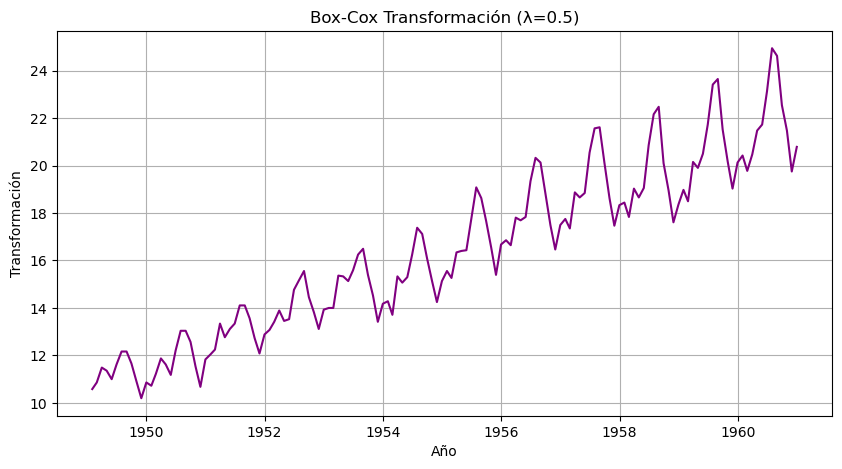

In [10]:

# Transformación Box-Cox con lambda = 0.5
boxcox_05 = np.sqrt(ts)  # Box-Cox con λ = 0.5 es equivalente a raíz cuadrada
plt.figure(figsize=(10, 5))
plt.plot(boxcox_05, color='purple')
plt.title("Box-Cox Transformación (λ=0.5)")
plt.xlabel("Año")
plt.ylabel("Transformación")
plt.grid()
plt.show()


In [11]:
from scipy.stats import boxcox

# Convertir a un array 1D antes de aplicar Box-Cox
ts_values = ts.values.flatten()

# Encontrar el lambda óptimo sin transformar la serie
lambda_opt = boxcox(ts_values)[1]

print("Lambda óptimo para Box-Cox:", lambda_opt)





Lambda óptimo para Box-Cox: 0.14802261727063243


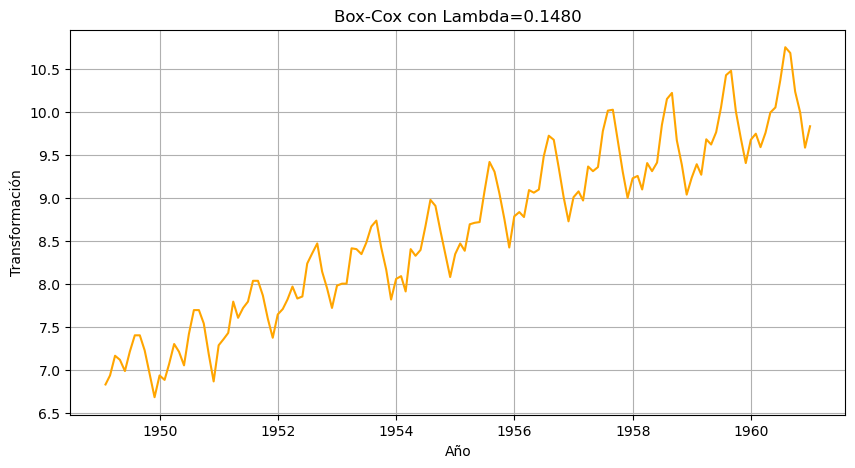

Desviación estándar de Box-Cox con λ=0.1480 0.9971197612491117


In [12]:

# Aplicar Box-Cox con lambda óptimo
boxcox_opt = boxcox(ts, lmbda=0.1480)
plt.figure(figsize=(10, 5))
plt.plot(ts.index, boxcox_opt, color='orange')
plt.title("Box-Cox con Lambda=0.1480")
plt.xlabel("Año")
plt.ylabel("Transformación")
plt.grid()
plt.show()

print("Desviación estándar de Box-Cox con λ=0.1480", np.std(boxcox_opt))


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pmdarima as pm
from scipy.stats import boxcox, jarque_bera
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf
from scipy.stats import t, boxcox, anderson
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.special import inv_boxcox
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import acorr_ljungbox 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.gofplots import qqplot
from statsmodels.sandbox.stats.runs import runstest_1samp

In [14]:
df=pd.read_csv("https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/gas.csv",delimiter=";",decimal=",",index_col=0,parse_dates=True )
df

C:\Users\wsand\AppData\Local\Temp\ipykernel_6212\831783019.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv("https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/gas.csv",delimiter=";",decimal=",",index_col=0,parse_dates=True )


,x
1,1709
2,1646
3,1794
4,1878
5,2173
...,...
472,49013
473,56624
474,61739
475,66600


In [15]:
Fecha=pd.date_range( start="1956-01-01", periods=len(df),  freq="ME")

In [16]:
df["Fecha"]=Fecha
df.set_index("Fecha", inplace=True)
z1=df.copy()


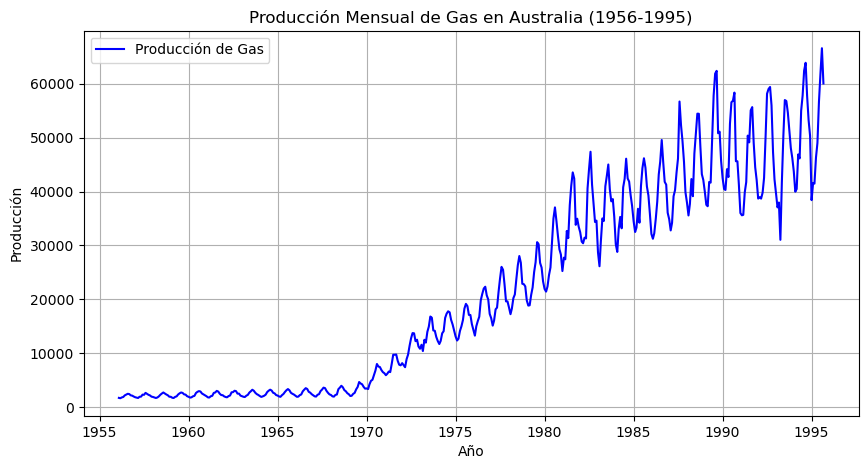

In [17]:

# Graficar la serie
plt.figure(figsize=(10, 5))
plt.plot(z1, color='blue', label="Producción de Gas")
plt.title("Producción Mensual de Gas en Australia (1956-1995)")
plt.xlabel("Año")
plt.ylabel("Producción")
plt.legend()
plt.grid()
plt.show()


In [18]:
# Determinar el mejor lambda para Box-Cox
from scipy.stats import boxcox

# Convertir a un array 1D antes de aplicar Box-Cox
ts_values = z1.values.flatten()
boxcox(ts_values)

(array([16.56774155, 16.41102418, 16.77195284, 16.96622363, 17.59718727,
        17.8879894 , 18.1623607 , 18.06685099, 17.61934235, 17.49121133,
        17.15359884, 16.84448685, 16.66964655, 16.51602862, 17.06073887,
        17.10737171, 17.86881978, 17.80702344, 18.46366638, 18.12582029,
        17.80702344, 17.57696755, 17.10737171, 16.96622363, 16.72223968,
        16.51602862, 16.74597158, 17.20160065, 17.82834452, 18.24011989,
        18.58994231, 18.2598389 , 17.92802947, 17.64140749, 17.08521668,
        17.03838784, 16.61894381, 16.51602862, 17.01369228, 17.22327767,
        17.92802947, 18.31503937, 18.58994231, 18.44465214, 17.96778063,
        17.86881978, 17.29205918, 17.03838784, 16.69600941, 16.82119823,
        17.24702121, 17.42494792, 18.42731059, 18.78239893, 19.001652  ,
        18.88426478, 18.27770509, 17.96778063, 17.68328504, 17.29205918,
        16.79546076, 16.72223968, 17.26851514, 17.42494792, 18.44465214,
        18.58994231, 19.06722831, 18.86660873, 18.2

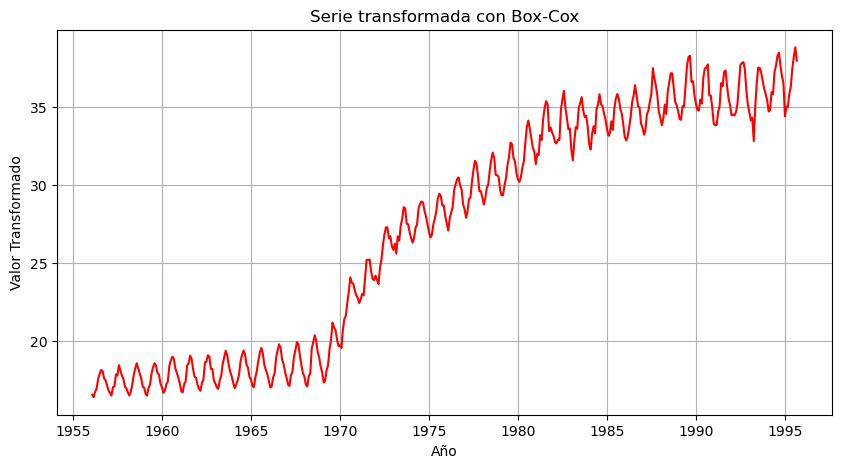

In [19]:

# Aplicar transformación Box-Cox
ts_boxcox = boxcox(z1, lmbda=0.1923)

# Graficar la serie transformada
plt.figure(figsize=(10, 5))
plt.plot(z1.index, ts_boxcox, color='red')
plt.title("Serie transformada con Box-Cox")
plt.xlabel("Año")
plt.ylabel("Valor Transformado")
plt.grid()
plt.show()


Descomposición de la serie

In [20]:
z2=z1.copy()

In [21]:
z1["x"]=ts_boxcox

In [22]:
z1

,x
Fecha,
1956-01-31,16.560700
1956-02-29,16.404091
1956-03-31,16.764770
1956-04-30,16.958905
1956-05-31,17.589423
...,...
1995-04-30,36.292098
1995-05-31,37.459976
1995-06-30,38.175375


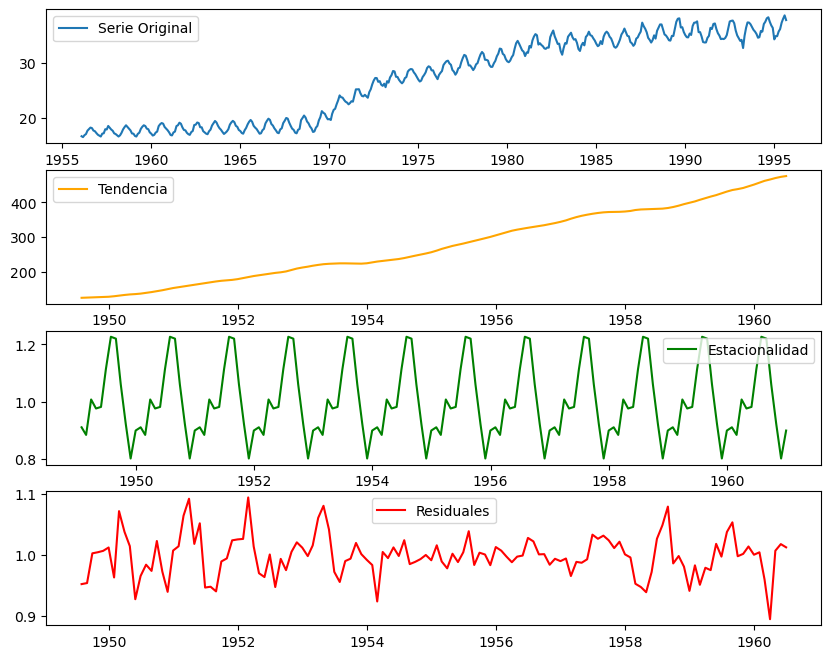

In [23]:
decomposition = seasonal_decompose(ts, model='multiplicative', period=12)

plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(z1, label='Serie Original')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Tendencia', color='orange')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Estacionalidad', color='green')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuales', color='red')
plt.legend()

plt.show()


In [24]:
z1

,x
Fecha,
1956-01-31,16.560700
1956-02-29,16.404091
1956-03-31,16.764770
1956-04-30,16.958905
1956-05-31,17.589423
...,...
1995-04-30,36.292098
1995-05-31,37.459976
1995-06-30,38.175375


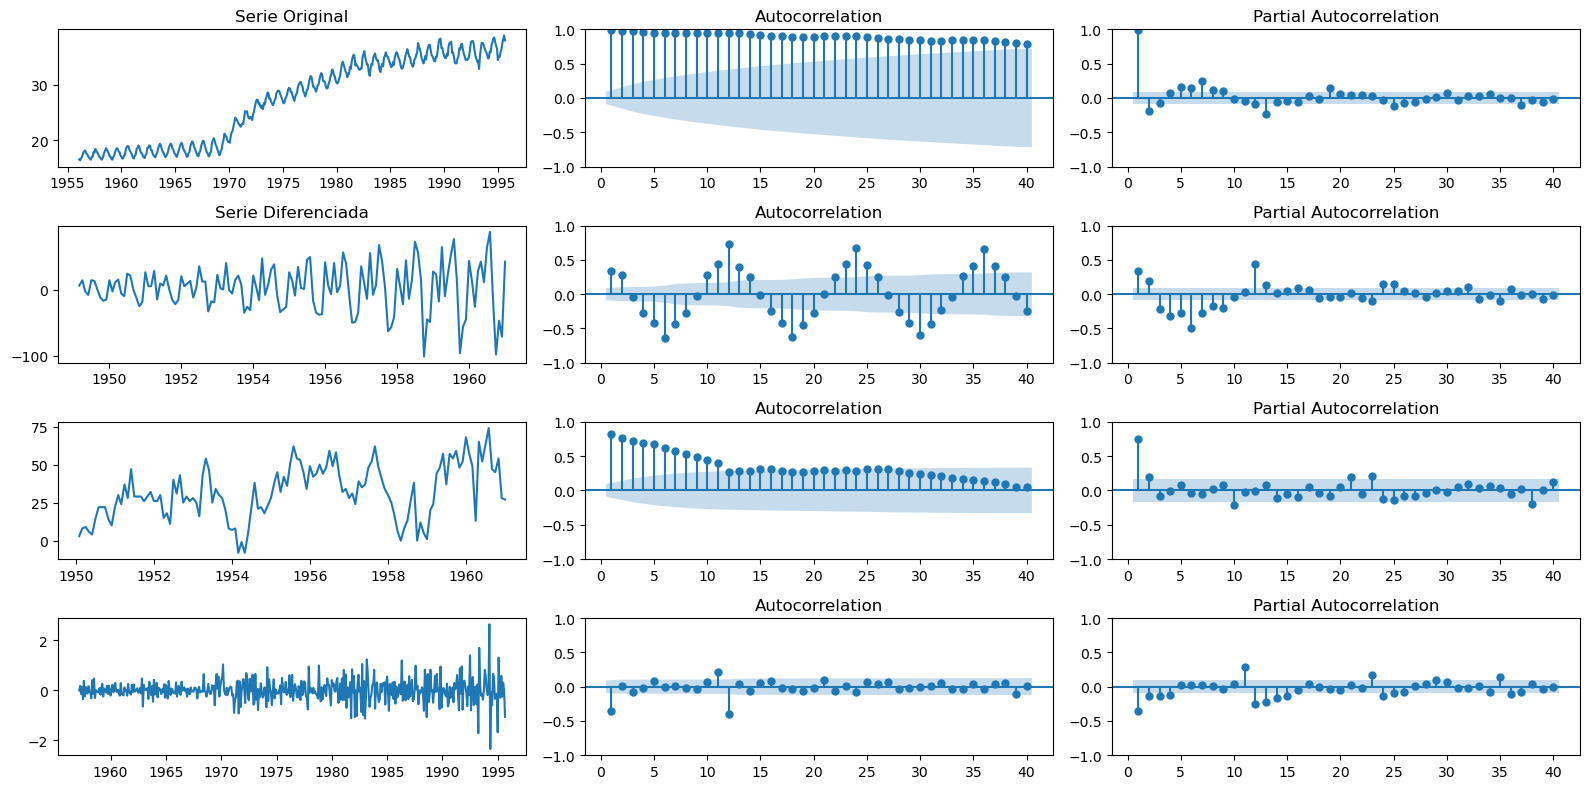

In [25]:
fig, ax = plt.subplots(4, 3, figsize=(16, 8))
ax[0, 0].plot(z1)
ax[0, 0].set_title("Serie Original")
plot_acf(z1, ax=ax[0, 1], lags=40, zero=False)
plot_pacf(z1, ax=ax[0, 2], lags=40, zero=False)
ax[1, 0].plot(ts.diff().dropna())

ax[1, 0].set_title("Serie Diferenciada")
plot_acf(z1.diff().dropna(), ax=ax[1, 1], lags=40,  zero=False)
plot_pacf(z1.diff().dropna(), ax=ax[1, 2], lags=40, zero=False)

ax[2,0].plot(ts.diff(12).dropna())
plot_acf(z1.diff(12).dropna(),ax[2,1], lags=40, zero=False)
plot_pacf(ts.diff(12).dropna(), ax[2,2], lags=40, zero=False)

ax[3,0].plot(z1.diff(12).diff().dropna())
plot_acf(z1.diff(12).diff().dropna(),ax[3,1], lags=40, zero=False)
plot_pacf(z1.diff(12).diff().dropna(), ax[3,2], lags=40, zero=False)


plt.tight_layout()
plt.show()


In [26]:
print("Prueba de Dickey-Fuller (ADF) - Serie Original:")
adf_result = adfuller(z1, autolag="AIC", maxlag=5)
print(f"ADF Statistic: {adf_result[0]}")
print(f"P-Value: {adf_result[1]}")

Prueba de Dickey-Fuller (ADF) - Serie Original:
ADF Statistic: -0.6899685158501978
P-Value: 0.8493308356395124


In [27]:
print("\nPrueba de Phillips-Perron (PP) - Serie Original:")
pp_result = PhillipsPerron(z1)
print(f"PP Statistic: {pp_result.stat}")
print(f"P-Value: {pp_result.pvalue}")


Prueba de Phillips-Perron (PP) - Serie Original:
PP Statistic: -0.6687706560115221
P-Value: 0.8546736840249742


In [28]:
z1_diff = z1.diff().dropna()

print("\nPrueba de Dickey-Fuller (ADF) - Serie Diferenciada:")
adf_result_diff = adfuller(z1_diff)
print(f"ADF Statistic: {adf_result_diff[0]}")
print(f"P-Value: {adf_result_diff[1]}")



Prueba de Dickey-Fuller (ADF) - Serie Diferenciada:
ADF Statistic: -3.5812618150789257
P-Value: 0.006129533484756662


In [29]:

print("\nPrueba de Phillips-Perron (PP) - Serie Diferenciada:")
pp_result_diff = PhillipsPerron(z1_diff)
print(f"PP Statistic: {pp_result_diff.stat}")
print(f"P-Value: {pp_result_diff.pvalue}")



Prueba de Phillips-Perron (PP) - Serie Diferenciada:
PP Statistic: -14.551093090405118
P-Value: 4.965476148716909e-27


In [30]:
print("Prueba de Dickey-Fuller (ADF) - D=1")
adf_result_D = adfuller(z1.diff(12).dropna(), autolag="AIC", maxlag=5) 
print(f"ADF Statistic: {adf_result_D[0]}")
print(f"P-Value: {adf_result_D[1]}")

Prueba de Dickey-Fuller (ADF) - D=1
ADF Statistic: -3.1966345456178877
P-Value: 0.020180313267738986


In [31]:
print("Phillips Perron D=1"  )
pp_result_D = PhillipsPerron(z1.diff(12).dropna())
print(f"PP Statistic: {pp_result_D.stat}")
print(f"P-Value: {pp_result_D}")

Phillips Perron D=1
PP Statistic: -7.489217923715647
P-Value:      Phillips-Perron Test (Z-tau)    
Test Statistic                 -7.489
P-value                         0.000
Lags                               18
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [32]:
print("Prueba de Dickey-Fuller (ADF) - D=1, d=1")
adf_result_D_d = adfuller(z1.diff(12).diff().dropna(), autolag="AIC", maxlag=5)
print(f"ADF Statistic: {adf_result_D_d[0]}")
print(f"P-Value: {adf_result_D_d[1]}")

Prueba de Dickey-Fuller (ADF) - D=1, d=1
ADF Statistic: -15.035783937099346
P-Value: 9.75379560734327e-28


In [33]:
print("Phillips Perron D=1, d=1"  )
pp_result_D_d = PhillipsPerron(z1.diff(12).diff().dropna())
print(f"PP Statistic: {pp_result_D_d.stat}")
print(f"P-Value: {pp_result_D_d}")

Phillips Perron D=1, d=1
PP Statistic: -38.80769513310658
P-Value:      Phillips-Perron Test (Z-tau)    
Test Statistic                -38.808
P-value                         0.000
Lags                               18
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


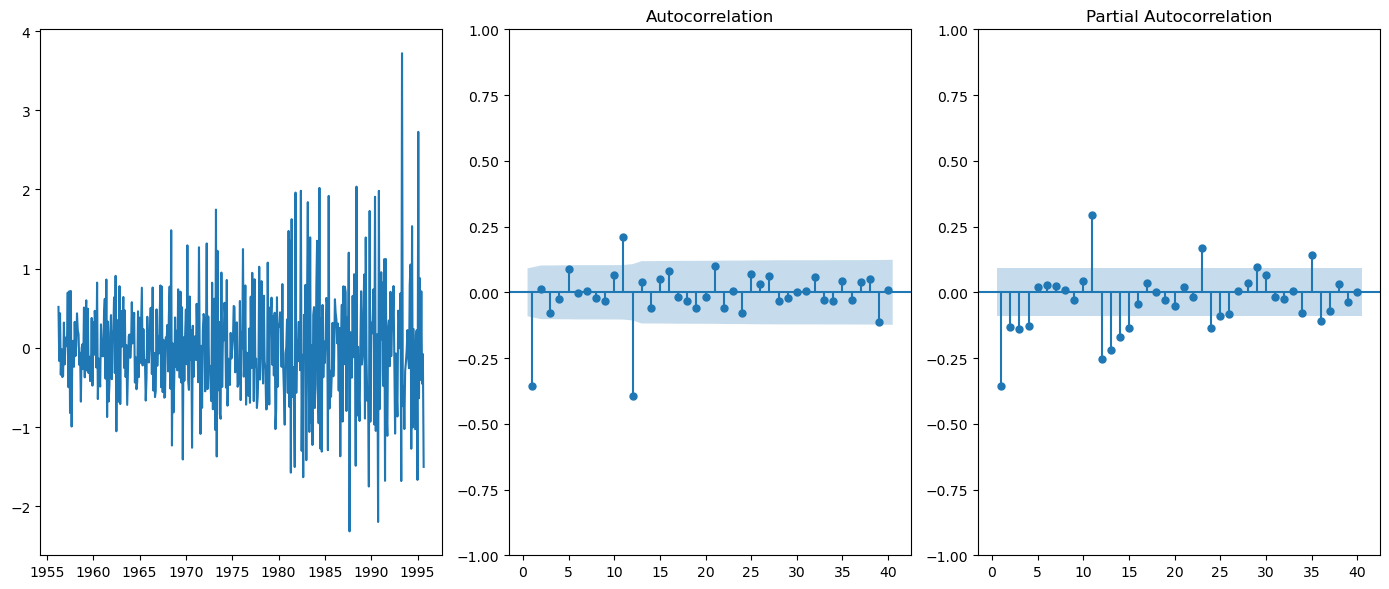

In [34]:
fig, ax=plt.subplots(1,3, figsize=(14,6))

ax[0].plot(z1.diff().diff().dropna())
plot_acf(z1.diff(12).diff().dropna(),ax[1], lags=40, zero=False)
plot_pacf(z1.diff(12).diff().dropna(), ax[2], lags=40, zero=False)


plt.tight_layout()
plt.show()


In [35]:
modelo_1 =ARIMA(z1, order=(0, 1, 1) , seasonal_order=(0,1,1,12)).fit()

c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [36]:
modelo_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                x   No. Observations:                  476
Model:             ARIMA(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -152.217
Date:                          Sat, 15 Mar 2025   AIC                            310.435
Time:                                  00:08:57   BIC                            322.848
Sample:                              01-31-1956   HQIC                           315.322
                                   - 08-31-1995                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4346      0.027    -15.971      0.000      -0.488      -0.381
ma.S.L12      -0.7941      0.026    -30.168      0.000      -0.846      -0.742
sigma2         0.1101      0.004     29.072      0.000       0.103       0.117
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               646.96
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               6.34   Skew:                            -0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

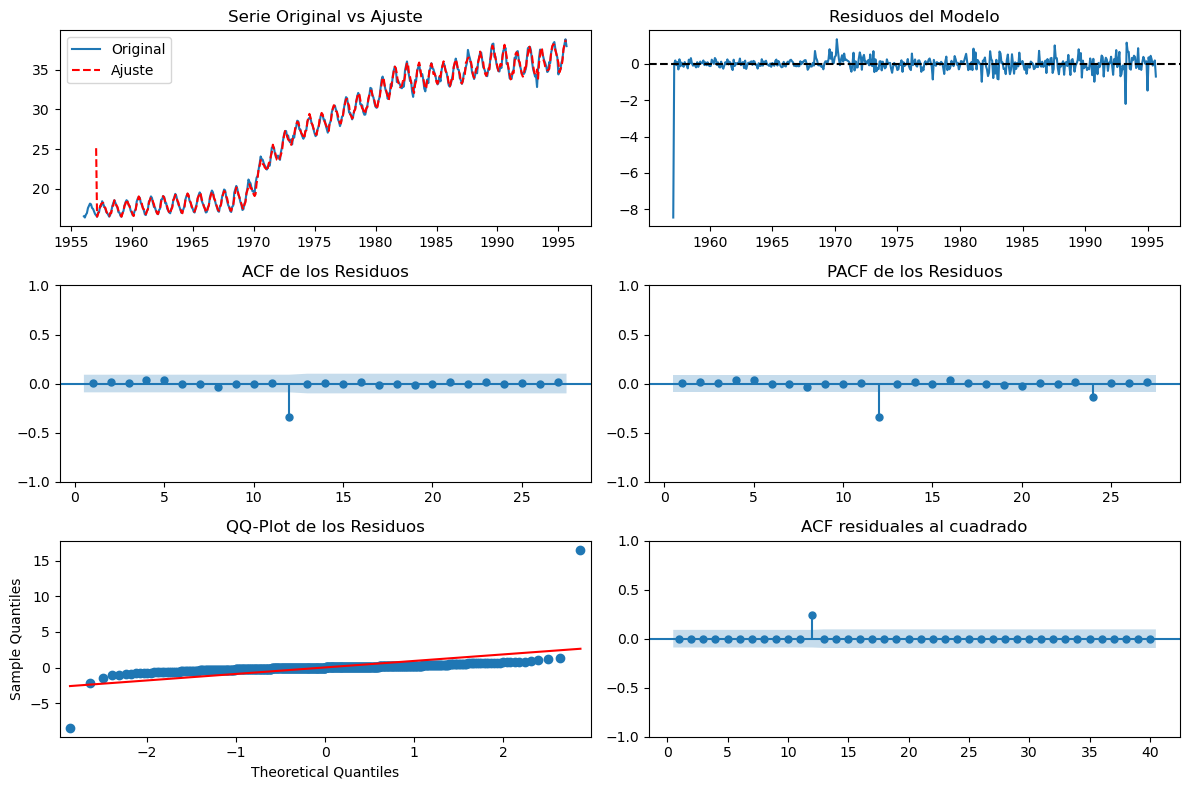

In [37]:
# Diagnóstico del modelo
residuals = modelo_1.resid

# Graficar residuos
fig, ax = plt.subplots(3, 2, figsize=(12, 8))
ax[0, 0].plot(z1, label="Original")
ax[0, 0].plot(modelo_1.fittedvalues[12:], color="red", linestyle="dashed", label="Ajuste")
ax[0, 0].set_title("Serie Original vs Ajuste")
ax[0, 0].legend()

ax[0, 1].plot(residuals[12:], label="Residuos")
ax[0, 1].set_title("Residuos del Modelo")
ax[0, 1].axhline(0, color="black", linestyle="dashed")

plot_acf(residuals, ax=ax[1, 0], zero=False)
ax[1, 0].set_title("ACF de los Residuos")

plot_pacf(residuals, ax=ax[1, 1], zero=False)
ax[1, 1].set_title("PACF de los Residuos")

qqplot(residuals, line='s', ax=ax[2, 0])
ax[2, 0].set_title("QQ-Plot de los Residuos")

plot_acf(residuals**2, ax[2,1], lags=40, zero=False)
ax[2, 1].set_title("ACF residuales al cuadrado")

plt.tight_layout()
plt.show()

In [38]:
lb_test = acorr_ljungbox(residuals,  return_df=True)
print("\nPrueba de Ljung-Box para Autocorrelación de Residuos:")
print(lb_test)



Prueba de Ljung-Box para Autocorrelación de Residuos:
     lb_stat  lb_pvalue
1   0.004964   0.943831
2   0.172470   0.917378
3   0.176530   0.981286
4   0.730983   0.947454
5   1.317945   0.933074
6   1.320106   0.970537
7   1.330707   0.987600
8   1.921947   0.983312
9   1.945399   0.992302
10  1.960254   0.996636


In [39]:
# Prueba de Normalidad de Jarque-Bera
jb_stat, jb_pvalue = jarque_bera(residuals)
print("\nPrueba de Normalidad de Jarque-Bera:")
print(f"Estadístico: {jb_stat}, P-valor: {jb_pvalue}")



Prueba de Normalidad de Jarque-Bera:
Estadístico: 1129289.0129528434, P-valor: 0.0


In [40]:
# Prueba de Aleatoriedad (Runs Test)
runs_stat, runs_pvalue = runstest_1samp(residuals)
print("\nPrueba de Aleatoriedad (Runs Test):")
print(f"Estadístico: {runs_stat}, P-valor: {runs_pvalue}")


Prueba de Aleatoriedad (Runs Test):
Estadístico: -1.3403112956985646, P-valor: 0.18014416065687633


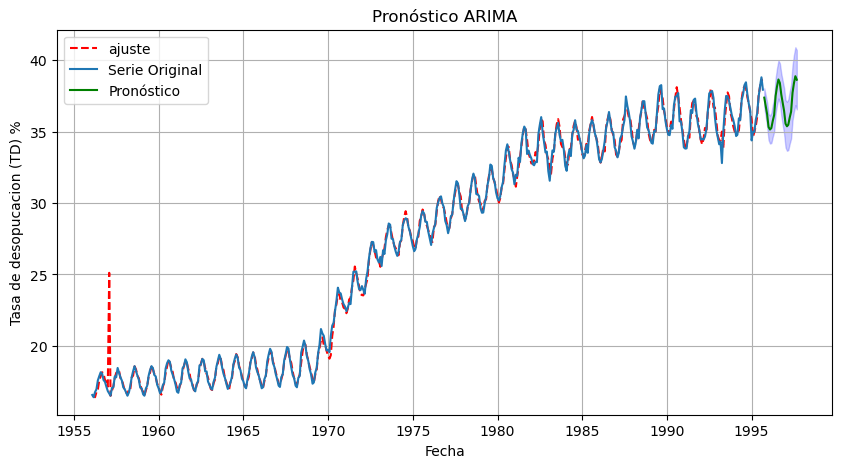

In [41]:
# Pronóstico del modelo
forecast_horizon = 24
forecast_result = modelo_1.get_forecast(steps=forecast_horizon)
forecast_mean = forecast_result.predicted_mean
forecast_ci = forecast_result.conf_int()

plt.figure(figsize=(10, 5))
plt.plot(modelo_1.fittedvalues.index[1:], modelo_1.fittedvalues[1:], color="red", linestyle="dashed", label="ajuste")
# Graficar el pronóstico
plt.plot(z1, label="Serie Original")
plt.plot(forecast_mean, color="green", label="Pronóstico")
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color="blue", alpha=0.2)
plt.title("Pronóstico ARIMA")
plt.xlabel("Fecha")
plt.ylabel("Tasa de desopucacion (TD) %")
plt.legend()
plt.grid(True)
plt.show()


In [42]:
lambda_opt

0.14802261727063243

In [43]:
df

,x
Fecha,
1956-01-31,1709
1956-02-29,1646
1956-03-31,1794
1956-04-30,1878
1956-05-31,2173
...,...
1995-04-30,49013
1995-05-31,56624
1995-06-30,61739


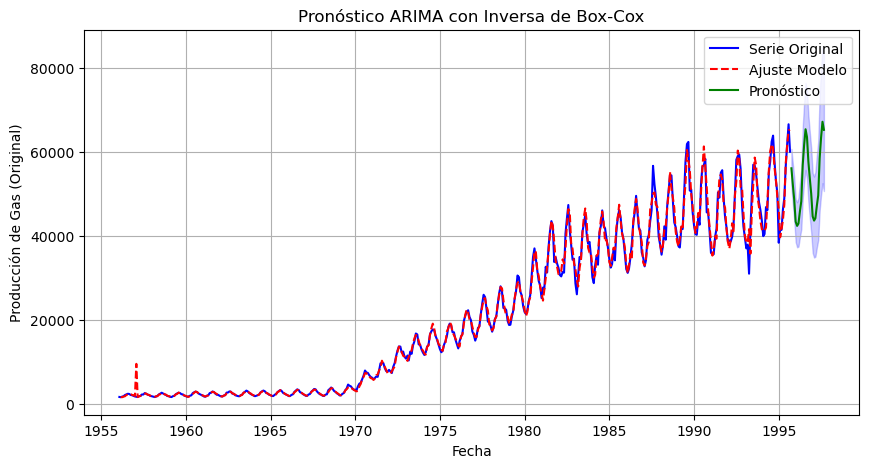

In [44]:
from scipy.special import inv_boxcox

# Definir lambda de la transformación Box-Cox
lambda_bc = 0.1923 # Sustituye con el lambda que usado en la transformación original

# Aplicar la inversa de Box-Cox a los valores ajustados
fitted_values_original = inv_boxcox(modelo_1.fittedvalues[1:], lambda_bc)

# Aplicar la inversa de Box-Cox al pronóstico
forecast_original = inv_boxcox(forecast_mean, lambda_bc)

# Aplicar la inversa de Box-Cox a los intervalos de confianza
forecast_ci_lower = inv_boxcox(forecast_ci.iloc[:, 0], lambda_bc)
forecast_ci_upper = inv_boxcox(forecast_ci.iloc[:, 1], lambda_bc)

# Graficar los datos originales y el pronóstico con valores reales
plt.figure(figsize=(10, 5))
plt.plot(z2, label="Serie Original", color="blue")
plt.plot(modelo_1.fittedvalues.index[1:], fitted_values_original, color="red", linestyle="dashed", label="Ajuste Modelo")
plt.plot(forecast_mean.index, forecast_original, color="green", label="Pronóstico")
plt.fill_between(forecast_ci.index, forecast_ci_lower, forecast_ci_upper, color="blue", alpha=0.2)

plt.title("Pronóstico ARIMA con Inversa de Box-Cox")
plt.xlabel("Fecha")
plt.ylabel("Producción de Gas (Original)")
plt.legend()
plt.grid(True)
plt.show()


In [45]:
z2

,x
Fecha,
1956-01-31,1709
1956-02-29,1646
1956-03-31,1794
1956-04-30,1878
1956-05-31,2173
...,...
1995-04-30,49013
1995-05-31,56624
1995-06-30,61739
